In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


import opendatasets as od

In [8]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification") # download dataset from kaggle

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishithashenith
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:07<00:00, 30.9MB/s]


In [9]:
BATCH_SIZE =32 # how much images show for model at one time
IMAGE_SIZE = (128,128)

In [10]:
train_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/train"  # difine the train and test forlder paths
test_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/train"

In [15]:
train_data =tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size =BATCH_SIZE,
                                                        image_size =IMAGE_SIZE,
                                                        subset='training',
                                                        validation_split=0.1,
                                                        seed=42)

validation_data =tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size =BATCH_SIZE,
                                                        image_size =IMAGE_SIZE,
                                                        subset='validation',
                                                        validation_split=0.1,
                                                        seed=42)
 #divide traning data set to validation and traning

test_data =tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size =BATCH_SIZE,
                                                        image_size =IMAGE_SIZE,
                                                        )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 8000 files belonging to 2 classes.


In [17]:
class_name = train_data.class_names
class_name


['cats', 'dogs']

In [18]:
for image_batch,lable_batch in train_data.take(1):
  print(image_batch.shape)

(12, 128, 128, 3)


In [20]:
#featue scalling
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [22]:
#data Augmentation

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

In [24]:
#Modle building
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']) #model compile

In [28]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
600/600 [==============================] - 21s 21ms/step - loss: 0.6933 - accuracy: 0.5594 - val_loss: 1.4428 - val_accuracy: 0.5075
Epoch 2/20
600/600 [==============================] - 11s 19ms/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.8212 - val_accuracy: 0.5700
Epoch 3/20
600/600 [==============================] - 12s 19ms/step - loss: 0.6292 - accuracy: 0.6389 - val_loss: 0.6212 - val_accuracy: 0.6313
Epoch 4/20
600/600 [==============================] - 13s 21ms/step - loss: 0.6142 - accuracy: 0.6614 - val_loss: 0.5639 - val_accuracy: 0.7088
Epoch 5/20
600/600 [==============================] - 12s 20ms/step - loss: 0.5963 - accuracy: 0.6782 - val_loss: 0.6205 - val_accuracy: 0.6550
Epoch 6/20
600/600 [==============================] - 12s 20ms/step - loss: 0.5827 - accuracy: 0.6885 - val_loss: 0.5232 - val_accuracy: 0.7487
Epoch 7/20
600/600 [==============================] - 11s 18ms/step - loss: 0.5649 - accuracy: 0.7001 - val_loss: 0.6645 - val_accuracy:

In [29]:

print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 343.281 seconds


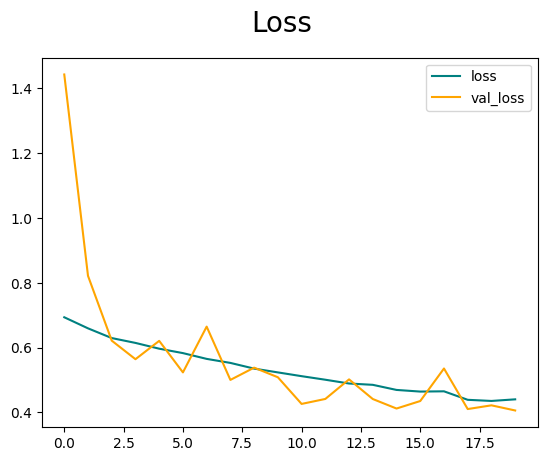

In [30]:
#Plot the loss and validation loat
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

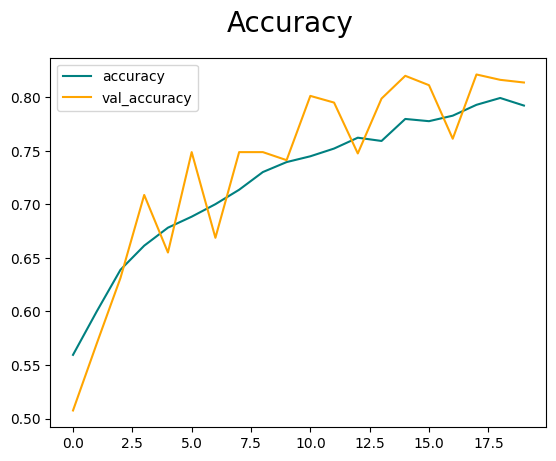

In [31]:
#plot the accuracy of training and validataion data set
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

Model Evaluvation

In [32]:

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [33]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 20ms/step


In [34]:

precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8057706>

In [35]:

recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.85875>

In [36]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.825875>

In [40]:
#Test
!pip install opencv-python -q
import cv2


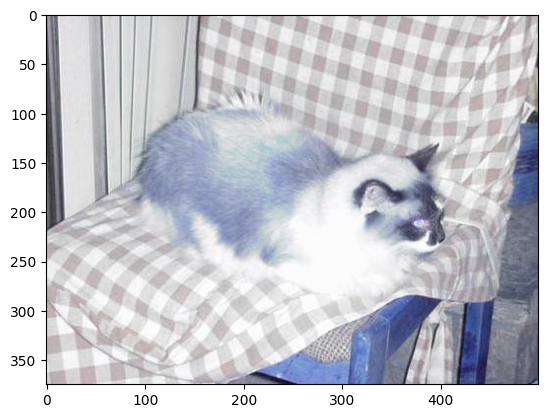

In [80]:

img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4011.jpg')
plt.imshow(img)
plt.show()

In [81]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255
scaled_image.shape

TensorShape([128, 128, 3])

In [82]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [83]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 19ms/step


In [84]:
yhat

array([[0.36183086]], dtype=float32)

In [85]:
class_name

['cats', 'dogs']

In [86]:

if yhat > 0.5:
    print(class_name[1])
else:
    print(class_name[0])

cats
